In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [47]:
df.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000
mean,36.460107,0.135858,0.183211,-1.509100,14.418195,-0.064143,0.022002,-0.005495,44.028549,-0.003442,0.125963,-1.591798,13.804597,-0.072885,0.021772,-0.004234,30.019521
std,41.225336,13.409322,13.474668,51.625332,12.391213,1.462626,1.799506,0.999990,46.761747,13.130364,13.171806,61.455194,12.463948,1.738660,1.816991,0.999996,25.255847
min,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,8.472775,-5.237190,-5.281100,-15.898650,3.773670,-1.284650,-1.526580,-1.000000,11.065550,-4.793870,-4.604685,-22.062650,3.737825,-1.892965,-1.556060,-1.000000,12.445200
50%,21.740200,0.141661,0.100544,-0.313360,12.972900,-0.061352,0.035015,-1.000000,25.291400,-0.035653,0.084512,-0.692463,11.690800,-0.136708,0.027453,-1.000000,21.283100
75%,50.059250,5.718920,5.652355,13.234400,20.026050,1.145405,1.562680,1.000000,66.983350,4.818905,5.063075,19.041800,19.601700,1.769300,1.597040,1.000000,39.025050
max,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.000000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


In [36]:
df.drop('Run', axis=1, inplace=True)
df.drop('Event', axis=1, inplace=True)
df.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [37]:
df.dropna(inplace = True)

In [38]:
y = df['M']
X = df.drop('M', axis=1)
names = X.columns

In [39]:
X = StandardScaler().fit_transform(X)
#y = StandardScaler().fit_transform(y.values.reshape(-1, 1))

In [40]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=90125)

In [9]:
model = LGBMRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
model.score(test_X, test_y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3576
[LightGBM] [Info] Number of data points in the train set: 79932, number of used features: 16
[LightGBM] [Info] Start training from score 30.099905


0.9589533066072027

In [78]:
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

RMSE test: 5.072263
MAE: 3.5690895375519363


In [68]:
test_y = np.array(test_y).ravel()  # Ensure test_y is 1-dimensional
pred_y = np.array(pred_y).ravel()  # Ensure pred_y is 1-dimensional

test_y_df = pd.DataFrame({'Actual_Value': test_y})
pred_y_df = pd.DataFrame({'Predicted_Value': pred_y})
result_df = pd.concat([test_y_df, pred_y_df], axis=1)
result_df

,Actual_Value,Predicted_Value
0,25.64920,25.897441
1,21.69630,35.997930
2,7.22472,14.330742
3,30.98740,30.546839
4,41.47520,44.662653
...,...,...
19978,15.44750,14.818975
19979,54.42620,50.833211
19980,28.41820,23.545340
19981,21.96070,16.858054


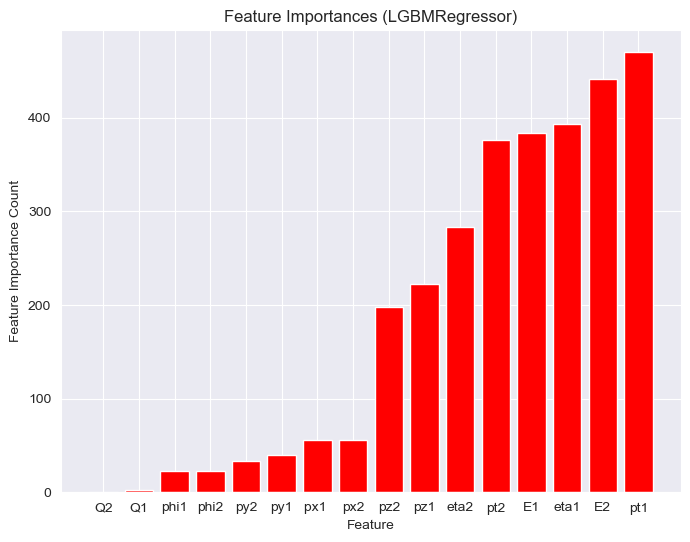

In [10]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Count')
plt.title('Feature Importances (LGBMRegressor)')
plt.show()

In [12]:
model = XGBRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
print("Model score:", model.score(test_X, test_y))
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

Model score: 0.9795320299302976
RMSE test: 3.581790
MAE: 2.5192653822564233


In [14]:
model = GradientBoostingRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
print(model.score(test_X, test_y))
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

0.7879999345026567
RMSE test: 11.527382
MAE: 7.992070199072846


In [16]:
model = HistGradientBoostingRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
print(model.score(test_X, test_y))
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

0.958748040499999
RMSE test: 5.084930
MAE: 3.5946328005728425


In [17]:
model = RandomForestRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
print(model.score(test_X, test_y))
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

0.9477751366451982
RMSE test: 5.721387
MAE: 3.829924121973678


In [18]:
model = DecisionTreeRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
print(model.score(test_X, test_y))
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

0.8251020776767517
RMSE test: 10.470201
MAE: 5.9537993159185305


In [24]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
model = XGBRegressor()

param_grid = {
    'n_estimators': [1000, 2000, 5000],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=30,
    scoring=mae_scorer,
    cv=5,
    verbose=1,
    random_state=90125,
    n_jobs=-1
)

search.fit(train_X, train_y)
print(f"Best parameters: {search.best_params_}")
print(f"Best MAE score: {-search.best_score_}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 5000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best MAE score: 1.1615431805024437


In [41]:
model = XGBRegressor(subsample = 1.0, n_estimators = 5000, min_child_weight = 1, max_depth = 7, learning_rate = 0.2, colsample_bytree = 0.8, random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
print("Model score:", model.score(test_X, test_y))
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

Model score: 0.9909961283150684
RMSE test: 2.375622
MAE: 1.503909053874347


In [42]:
test_y = np.array(test_y).ravel()  # Ensure test_y is 1-dimensional
pred_y = np.array(pred_y).ravel()  # Ensure pred_y is 1-dimensional

test_y_df = pd.DataFrame({'Actual_Value': test_y})
pred_y_df = pd.DataFrame({'Predicted_Value': pred_y})
result_df = pd.concat([test_y_df, pred_y_df], axis=1)
result_df

,Actual_Value,Predicted_Value
0,25.64920,20.499660
1,21.69630,30.021755
2,7.22472,8.124666
3,30.98740,27.365152
4,41.47520,44.308174
...,...,...
19978,15.44750,14.886752
19979,54.42620,55.266792
19980,28.41820,25.794876
19981,21.96070,19.758512


   Feature  Importance
7       Q1    0.000373
15      Q2    0.000461
6     phi1    0.004125
14    phi2    0.005286
9      px2    0.007646
1     px1     0.008274
10     py2    0.009601
2      py1    0.016277
8       E2    0.080245
0       E1    0.082711
5     eta1    0.087123
3      pz1    0.108621
13    eta2    0.115875
4      pt1    0.117156
11     pz2    0.151111
12     pt2    0.205115


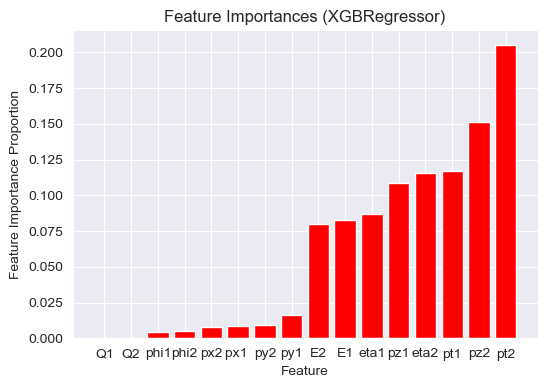

In [48]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=True)
print(importance_df)

plt.figure(figsize=(6, 4))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Proportion')
plt.title('Feature Importances (XGBRegressor)')
plt.show()